Proyecto Final
==============

### Tratamiento de Datos
### Máster de Ing. de Telecomunicación

## Autores

Juan Manuel Espinosa Moral ([100406523@alumnos.uc3m.es](mailto:100406523@alumnos.uc3m.es))

José Manuel García Núñez ([100544621@alumnos.uc3m.es](mailto:100544621@alumnos.uc3m.es))

In [1]:
# Integración en Collab

# Librerías de drive
from google.colab import drive
import os, sys

# Montaje
drive.mount("/content/drive")

# Directorio actual
print(os.getcwd())

# Cambio de directorio al compartido
directory_path = "/content/drive/MyDrive/Colab Notebooks/proyecto_td/"  # path
# If para crear el directorio en su path en caso de no existir
if not os.path.exists(directory_path):
  os.makedirs(directory_path)
  print(f"Directory created: {directory_path}")

os.chdir(directory_path) # switch de directorio

Mounted at /content/drive
/content


## 1. Análisis de Variables de Entrada

- Carga del dataset: datos del archivo JSON.
- Categorías: las más frecuentes.
- Rating y visualizaciones.
- Análisis de correlación: categorias y variables de salida.

In [2]:
# Create directory to store results
if not os.path.exists("data/section1/"):
  os.makedirs("data/section1/")
  print(f"Directory created: {'data/section1/'}")

Categorías más frecuentes:
 categories
Bon Appétit      9355
Peanut Free      8390
Soy Free         8088
Tree Nut Free    7044
Vegetarian       6846
Name: count, dtype: int64


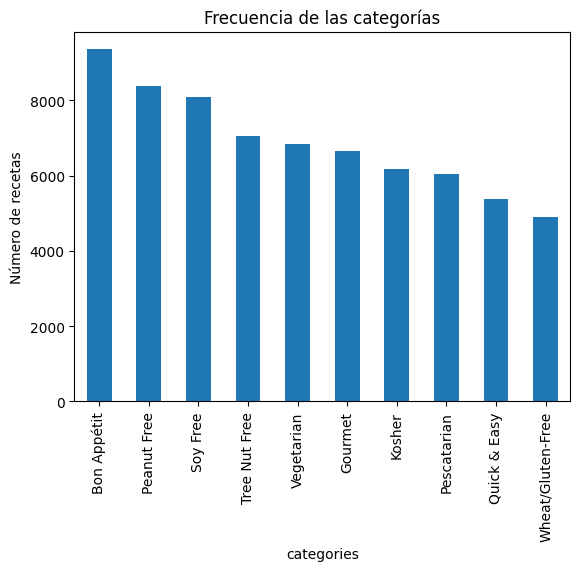

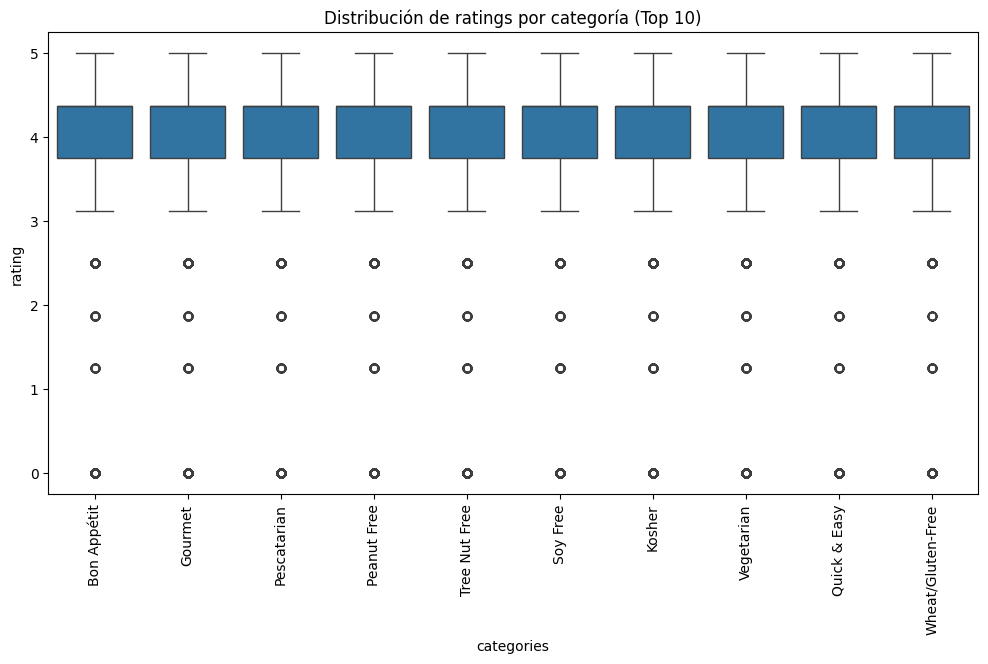

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el JSON
if not os.path.exists("full_format_recipes.json"):
  df = pd.read_json("data/full_format_recipes.json")
else:
  df = pd.read_json("full_format_recipes.json")

# Explorar categories en cuanto a aparición
category_counts = df['categories'].explode().value_counts()
print("Categorías más frecuentes:\n", category_counts.head())

# Top 10 categories
category_counts.head(10).plot(kind='bar', title="Frecuencia de las categorías")
plt.ylabel("Número de recetas")
plt.savefig("data/section1/no_recipes.png")
plt.show()

# Analizar la relación entre categorías y ratings, filtrando por las más frecuentes
df_exploded = df.explode('categories')  # Expandir listas de categorías
df_exploded = df_exploded.reset_index(drop=True)  # Resetear el índice

# Filtrar por las 10 categorías con mejor rating
top_categories = category_counts.head(10).index.tolist()
df_filtered = df_exploded[df_exploded['categories'].isin(top_categories)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='categories', y='rating', data=df_filtered)
plt.xticks(rotation=90)
plt.title("Distribución de ratings por categoría (Top 10)")
plt.savefig("data/section1/ratings_distribution_top10.png")
plt.show()

In [ ]:
# correlacion y heatmap de variables
correlation = df[['fat', 'protein', 'calories', 'sodium', 'rating']].corr()

print(correlation)

sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig("data/section1/corr.png")
plt.show()

In [ ]:
# Relación de ratings por categories
df_exploded = df.explode('categories')  # Expandir listas de categorías
df_exploded = df_exploded.reset_index(drop=True)
plt.figure(figsize=(120, 6))
sns.boxplot(x='categories', y='rating', data=df_exploded)
plt.xticks(rotation=90)
plt.title("Distribución de ratings por categoría")
plt.savefig("data/section1/ratings_distribution.png")
plt.show()

In [ ]:
# import matplotlib.pyplot as plt

# Analisis logarítmico relacionando fat y rating
plt.scatter(df['fat'], df['rating'])
plt.xscale('log')  # Apply logarithmic scale to x-axis
plt.xlabel('Fat (grams) - Log Scale')
plt.ylabel('Rating')
plt.title('Fat vs. Rating (Log Scale)')
plt.savefig("data/section1/ratings_vs_calories_log.png")
plt.show()

In [ ]:
# Relación entre rating y calories

# se definen los tramos de calorias
bins = [0, 200, 400, 600, 800, 1000, float('inf')]
labels = ['0-200', '201-400', '401-600', '601-800', '801-1000', '1001+']

# creación de una columna independiente con calorías
df['calorie_bins'] = pd.cut(df['calories'], bins=bins, labels=labels)

# creación de una medía de calorias en baase al rating
average_ratings = df.groupby('calorie_bins')['rating'].mean()

# graficación de resultados
plt.bar(average_ratings.index, average_ratings.values)
plt.xlabel('Calorie Range')
plt.ylabel('Average Rating')
plt.title('Average Rating vs. Calories')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("data/section1/ratings_vs_calories.png")
plt.show()

In [ ]:
# se definen los tramos de grasa (gramos)
bins_fat = [0, 10, 20, 30, 40, 50, float('inf')]
labels_fat = ['0-10', '11-20', '21-30', '31-40', '41-50', '51+']

# creación de una columna independiente con grasas
df['fat_bins'] = pd.cut(df['fat'], bins=bins_fat, labels=labels_fat)

# creación de una media de calorias en base a la cantidad de grasas
average_ratings = df.groupby('fat_bins')['rating'].mean()

# graficación de resultados
plt.bar(average_ratings.index, average_ratings.values)
plt.xlabel('Fat Range')
plt.ylabel('Average Rating')
plt.title('Average Rating vs. Fat')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("data/section1/ratings_vs_fat.png")
plt.show()

In [ ]:
# se definen los tramos de proteina (gramos)
bins_protein = [0, 10, 20, 30, 40, 50, float('inf')]
labels_protein = ['0-10', '11-20', '21-30', '31-40', '41-50', '51+']

# creación de una columna independiente con proteina
df['protein_bins'] = pd.cut(df['protein'], bins=bins_protein, labels=labels_protein)

# creación de una media de calorias en base a la cantidad de proteina
average_ratings = df.groupby('protein_bins')['rating'].mean()

# graficación de resultados
plt.bar(average_ratings.index, average_ratings.values)
plt.xlabel('Protein Range')
plt.ylabel('Average Rating')
plt.title('Average Rating vs. Protein')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("data/section1/ratings_vs_protein.png")
plt.show()

In [ ]:
# Esta parte no se si tiene mucho sentido mantener

'''
top_20_categories = df_exploded['categories'].value_counts().head(20).index.tolist()
df_filtered = df_exploded[df_exploded['categories'].isin(top_20_categories)]

variables = ['fat', 'protein', 'calories', 'sodium', 'rating']
for variable in variables:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='categories', y=variable, data=df_filtered)
    plt.xticks(rotation=90)
    plt.title(f'{variable.capitalize()} Distribution by Top 20 Categories')
    plt.tight_layout()
    plt.show()
'''

In [8]:
# Guardamos el resultado
df.to_csv("data/section1/df_formatted.csv", index=False)

## 2. Implementación de un *pipeline* para el preprocesado de los textos

In [4]:
# Create directory to store results
if not os.path.exists("data/section2/"):
  os.makedirs("data/section2/")
  print(f"Directory created: {'data/section2/'}")

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Cargamos el DF de la sección anterior
df = pd.read_csv("data/section1/df_formatted.csv")

In [7]:
import re
import spacy

# cargado de spaCy
nlp = spacy.load("en_core_web_sm")

# Contar instancias antes de la eliminación
print(f"Número de instancias antes de la eliminación: {len(df)}")

# Eliminar instancias con 'desc' vacío o nulo
df = df.dropna(subset=['desc'])  # Eliminar filas con valores NaN en 'desc'
df = df[df['desc'] != '']  # Eliminar filas con cadenas vacías en 'desc'

# Contar instancias después de la eliminación
print(f"Número de instancias después de la eliminación: {len(df)}")

# definición del método de procesado de texto del pipeline
def preprocess_text(text, use_spacy=False):

    # Si el texto es NaN o no es string/list, convertirlo a cadena vacía
    if not isinstance(text, (str, list)):
        text = ''

    # si el texto es una lista, unir sus elementos en una sola cadena
    if isinstance(text, list):
        text = ' '.join(text)

    # pasar a minúsculas
    text = text.lower()

    # Eliminar caracteres especiales y números
    text = re.sub(r'[^a-z\s]', '', text)

    if use_spacy:
        # Usar SpaCy para tokenización y lematización
        doc = nlp(text)
        tokens = [token.lemma_ for token in doc if not token.is_stop]
    else:
        # Tokenizar el texto
        tokens = nltk.word_tokenize(text)

        # Eliminar stopwords
        stop_words = set(stopwords.words('english'))
        tokens = [word for word in tokens if word not in stop_words]

        # Lematizar
        lemmatizer = nltk.WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Unir tokens de nuevo en un solo string
    processed_text = ' '.join(tokens)
    return processed_text

# Para "categories"

# Manejar valores NaN en la columna 'categories'
df['categories'] = df['categories'].fillna('')

# Aplicar el pipeline al conjunto de datos
df['processed_categories'] = df['categories'].apply(preprocess_text, use_spacy=True)

# print de resultados
print(df[['categories', 'processed_categories']].head())

# Para "desc"

# Manejar valores NaN en la columna 'categories'
df['desc'] = df['desc'].fillna('')

# Aplicar el pipeline al conjunto de datos
df['processed_desc'] = df['desc'].apply(preprocess_text, use_spacy=True)

# print de resultados
print(df[['desc', 'processed_desc']].head())

# Guardamos el resultado
#df.to_csv("data/section2/df_proccessed.csv", index=False)

Número de instancias antes de la eliminación: 20130
Número de instancias después de la eliminación: 13495
                                          categories  \
1  ['Food Processor', 'Onion', 'Pork', 'Bake', 'B...   
3  ['Fish', 'Olive', 'Tomato', 'Sauté', 'Low Fat'...   
5  ['Sandwich', 'Food Processor', 'Tomato', 'Kid-...   
6  ['Salad', 'Potato', 'Side', 'Easter', 'Low Fat...   
7  ['Egg', 'Fruit', 'No-Cook', 'Cocktail Party', ...   

                                processed_categories  
1  food processor onion pork bake bastille day ne...  
3  fish olive tomato saut low fat low cal high fi...  
5  sandwich food processor tomato kidfriendly qui...  
6  salad potato easter low fat quick   easy ham a...  
7  egg fruit nocook cocktail party vegetarian win...  
                                                desc  \
1  This uses the same ingredients found in boudin...   
3  The Sicilian-style tomato sauce has tons of Me...   
5  This recipe can be prepared in 45 minutes or l...   
6  

## 3. Representación vectorial de los documentos mediante tres procedimientos diferentes

In [22]:
# Create directory to store results
if not os.path.exists("data/section3/"):
  os.makedirs("data/section3/")
  print(f"Directory created: {'data/section3/'}")

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
# Cargamos el DF de la sección anterior
df = pd.read_csv("data/section2/df_proccessed.csv")

### Procedimiento 1: TF-IDF

In [25]:
# Bibliotecas
from sklearn.feature_extraction.text import TfidfVectorizer

# Para "categories"

# Creación del objeto a vectorizar
vectorizer = TfidfVectorizer()

# conversión de datos para vectorizar
tfidf_matrix1 = vectorizer.fit_transform(df['processed_categories'].fillna("").tolist())

# extracción de los nombres
feature_names1 = vectorizer.get_feature_names_out()

# creación del dataframe con los datos convertidos a arrays pasados por el método y los nombres extraidos
tfidf_df1 = pd.DataFrame(tfidf_matrix1.toarray(), columns=feature_names1, index=df.index)

# Guardamos el resultado
tfidf_df1.to_csv("data/section3/df_categories_with_tfidf.csv", index=False)

# print de los resultados
print("TF-IDF DataFrame for 'processed_categories':")
#print(tfidf_df1)

# Para "desc"

# Creación del objeto a vectorizar
vectorizer2 = TfidfVectorizer()  # Or use: vectorizer = TfidfVectorizer() if reusing

# conversión de datos para vectorizar
tfidf_matrix2 = vectorizer2.fit_transform(df['processed_desc'].fillna("").tolist())  # Or use: vectorizer.fit_transform if reusing

# extracción de los nombres
feature_names2 = vectorizer2.get_feature_names_out()  # Or use: vectorizer.get_feature_names_out() if reusing

# creación del dataframe con los datos convertidos a arrays pasados por el método y los nombres extraidos
tfidf_df2 = pd.DataFrame(tfidf_matrix2.toarray(), columns=feature_names2, index=df.index)

# print de los resultados
print("\nTF-IDF DataFrame for 'processed_desc':")
#print(tfidf_df2)

# Guardamos el resultado
#tfidf_df2.to_csv("data/section3/df_desc_with_tfidf.csv", index=False)

TF-IDF DataFrame for 'processed_categories':

TF-IDF DataFrame for 'processed_desc':


### Procedimiento 2: *Word2Vec*

In [ ]:
# Bibliotecas
!pip install nltk==3.8.1
!pip install gensim

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import numpy as np
from gensim.models import Word2Vec

# Método para obtener vectores promediados
def get_vector(text_words, model):
  """Obtiene el vector promedio para un texto."""
  vectors = [model.wv[word] for word in text_words if word in model.wv]
  if vectors:
    return np.mean(vectors, axis=0)
  else:
    return np.zeros(model.vector_size)  # Vector de ceros si no hay palabras en el vocabulario

# Word2Vec para "categories"

# 1. Preparar datos de texto para 'categories'
sentences1 = [row.split() for row in df['processed_categories'].fillna("")]

# 2. Entrenar el modelo para 'categories'
model1 = Word2Vec(sentences1, vector_size=100, window=5, min_count=5, workers=4)

# 3. Obtener vectores promediados para 'categories'
df['category_vector'] = df['processed_categories'].fillna("").apply(lambda x: get_vector(x.split(), model1))

# Muestra 5 resultados
print("Resultados para 'categories':")
for index in range(5):
  print(f"Fila {index}: {df['category_vector'][index][:5]}")

# Word2Vec para "desc"

# 1. Preparar datos de texto para 'categories'
sentences2 = [row.split() for row in df['processed_desc'].fillna("")]

# 2. Entrenar el modelo para 'categories'
model2 = Word2Vec(sentences2, vector_size=100, window=5, min_count=5, workers=4)

# 3. Obtener vectores promediados para 'categories'
df['desc_vector'] = df['processed_desc'].fillna("").apply(lambda x: get_vector(x.split(), model2))

# Muestra 5 resultados
print("\nResultados para 'desc':")
for index in range(5):
  print(f"Fila {index}: {df['desc_vector'][index][:5]}")

# Guardamos el resultado
df.to_csv("data/section3/df_with_word2vec.csv", index=False)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 5.2 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.9.1
    Uninstalling nltk-3.9.1:
      Successfully uninstalled nltk-3.9.1


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Resultados para 'categories':
Fila 0: [-0.36132136 -0.03043784 -0.00969278  0.168823    0.06053791]
Fila 1: [ 0.2934507   0.33170673  0.50423086  0.3066962  -0.42774627]
Fila 2: [ 0.08064254  0.13528024 -0.07694367  0.06842414  0.15994993]
Fila 3: [ 0.1385764   0.34792793  0.44530788  0.3044269  -0.46709654]
Fila 4: [-0.149095    0.20605686 -0.15195954 -0.22043355  0.12438139]

Resultados para 'desc':
Fila 0: [-0.43966815  0.30421808  0.21611947 -0.10991096  0.0754493 ]
Fila 1: [-0.3182476   0.25045532  0.11790009  0.01340404  0.08105212]
Fila 2: [-0.55189097  0.25795457  0.39631048  0.48252594 -0.09297929]
Fila 3: [-0.15018404  0.26101404  0.11748631  0.04600652  0.03988409]
Fila 4: [-0.31877407  0.19949296  0.05090053 -0.06280695  0.12145004]


### **DEBUG**: *Testing* de los metodos de vectorización TF-IDF y vec2sec

In [ ]:
from wordcloud import WordCloud
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA # Import PCA
import numpy as np # Import numpy

# Visualización de TF-IDF con Nube de Palabras
word_weights = dict(zip(feature_names1, tfidf_matrix1.sum(axis=0).tolist()[0]))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_weights)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de Palabras TF-IDF")
plt.savefig("data/section3/tf_idf_wordcloud.png")
plt.show()

# Visualización de Word2Vec con PCA
pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(df['category_vector'].to_list())
plt.figure(figsize=(10, 10))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1])
plt.title("Visualización de vectores Word2Vec con PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.savefig("data/section3/word2vec_pca.png")
plt.show()

# Visualización de Word2Vec con t-SNE

tsne = TSNE(n_components=2, random_state=42)
# Convert the list of vectors to a 2D NumPy array
category_vectors = df['category_vector'].to_list()
vectors_2d = tsne.fit_transform(np.array(category_vectors).reshape(len(category_vectors), -1)) # Reshape if necessary
plt.figure(figsize=(10, 10))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1])
plt.title("Visualización de vectores Word2Vec con t-SNE")
plt.xlabel("Dimensión 1")
plt.ylabel("Dimensión 2")
plt.savefig("data/section3/word2vec_tsne.png")
plt.show()

### Procedimiento 3: *Embeddings* contextuales calculados a partir de modelos

---

basados en *transformers*

#### Sin gradientes

In [ ]:
# Import de Pytorch y BERT
from transformers import BertTokenizer, BertModel
import torch

# Usar GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

# Reducir el tamaño del dataset a un 10%
df_sampled = df.sample(frac=0.1, random_state=42)

# Cargar el modelo y el tokenizer de BERT
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

# Función para generar embeddings contextuales
def generate_bert_embeddings(text):
    # Tokenizar el texto
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)

    # Desactivar gradientes
    with torch.no_grad():
        outputs = model(**inputs)

    # extraer embeddings
    embeddings = outputs.last_hidden_state[:, 0, :].squeeze(0).cpu().numpy()
    return embeddings

# Aplicar BERT a las columnas y conversión de los embeddings en listas
df_sampled['bert_embeddings_categories'] = df_sampled['processed_categories'].fillna("").apply(lambda x: generate_bert_embeddings(x).tolist())
df_sampled['bert_embeddings_desc'] = df_sampled['processed_desc'].fillna("").apply(lambda x: generate_bert_embeddings(x).tolist())

# Guardar el resultado en un archivo CSV (opcional)
df_sampled.to_csv("data/section3/df_with_bert_embeddings.csv", index=False)

# visualizar algunos registros
print(df_sampled[['processed_categories', 'bert_embeddings_categories']].head())
print(df_sampled[['processed_desc', 'bert_embeddings_desc']].head())


cpu


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

                                   processed_categories  \
6173  salad egg mustard potato zucchini summer chive...   
833   garlic tomato backyard bbq dinner seafood tuna...   
3289       egg fish nocook pine nut tuna cabbage sesame   
2578  egg mustard roast pork tenderloin red wine fal...   
5987  bake high fiber dinner raisin almond cornmeal ...   

                             bert_embeddings_categories  
6173  [-0.6394898295402527, -0.3973914682865143, -0....  
833   [-0.4517255127429962, -0.049862828105688095, -...  
3289  [-0.6225535273551941, 0.12820486724376678, -0....  
2578  [-0.7708455920219421, -0.06715213507413864, 0....  
5987  [-0.7522163987159729, -0.13959255814552307, -0...  
                                         processed_desc  \
6173                            recipe prepare   minute   
833   rooftop chef rick baylesss chicago restaurant ...   
3289  editor note recipe introductory text excerpt c...   
2578                               serve red wine sauce   
59

#### Con gradientes

In [20]:
from transformers import BertTokenizer, BertModel
import torch

# Usar GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

# Reducir el tamaño del dataset para pruebas (opcional)
df_sampled = df.sample(frac=0.1, random_state=42)

# Cargar el modelo y el tokenizer de BERT
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

# Configurar el modelo en modo entrenamiento
model.train()

# Configurar un optimizador
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)

def generate_bert_embeddings_with_gradients(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    outputs = model(**inputs)
    cls_embeddings = outputs.last_hidden_state[:, 0, :]
    cls_embeddings.retain_grad()
    loss = cls_embeddings.norm()
    loss.backward()
    gradients = cls_embeddings.grad.detach().cpu().numpy()
    return cls_embeddings.detach().cpu().numpy(), gradients

# Aplicar BERT con gradientes a 'processed_categories'
df_sampled['bert_embeddings_categories'] = df_sampled['processed_categories'].fillna("").apply(
    lambda x: generate_bert_embeddings_with_gradients(x)
)

# Aplicar BERT con gradientes a 'processed_desc'
df_sampled['bert_embeddings_desc'] = df_sampled['processed_desc'].fillna("").apply(
    lambda x: generate_bert_embeddings_with_gradients(x)
)

# Guardar el resultado en un archivo CSV (opcional)
df_sampled.to_csv("data/section3/df_with_bert_embeddings.csv", index=False)

# Visualizar los resultados
#print(df_sampled[['processed_categories', 'bert_embeddings_categories', 'processed_desc', 'bert_embeddings_desc']].head())

cuda:0


KeyError: 'processed_categories'

### Procedimiento 4: Embeddings contextuales con RoBERTa

In [9]:
from transformers import RobertaTokenizer, RobertaModel
import torch
import pandas as pd
import numpy as np
import warnings

# Suprimir advertencias específicas relacionadas con TensorFlow y PyTorch/XLA
warnings.filterwarnings("ignore", message=".*tensorflow.*")

# Reducir el tamaño del dataset para pruebas (opcional)
df_sampled = df.sample(frac=0.1, random_state=42)

# Cargar el modelo y el tokenizer de RoBERTa
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")
model = RobertaModel.from_pretrained("roberta-base")

# Configurar el modelo en modo entrenamiento
model.train()

# Configurar un optimizador
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)

def generate_roberta_embeddings_with_gradients(text):
    # Asegurarse de que la entrada sea una cadena
    if not isinstance(text, str):
        text = "" if pd.isna(text) else str(text)
    # Tokenizar el texto y generar tensores de entrada
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    # Pasar los datos por el modelo
    outputs = model(**inputs)
    # Extraer el embedding del token [CLS] (primer token)
    cls_embeddings = outputs.last_hidden_state[:, 0, :]
    # Retener el gradiente para el embedding
    cls_embeddings.retain_grad()
    # Calcular una pérdida ficticia (norma de los embeddings) para propagar gradientes
    loss = cls_embeddings.norm()
    loss.backward()
    # Extraer los gradientes
    gradients = cls_embeddings.grad.detach().cpu().numpy()
    # Retornar embeddings y gradientes
    return cls_embeddings.detach().cpu().numpy(), gradients

# Asegurarse de que las columnas sean cadenas antes de aplicar la función
df_sampled['processed_categories'] = df_sampled['processed_categories'].astype(str)
df_sampled['processed_desc'] = df_sampled['processed_desc'].astype(str)

# Aplicar RoBERTa con gradientes a 'processed_categories'
df_sampled['roberta_embeddings_categories'] = df_sampled['processed_categories'].apply(
    lambda x: generate_roberta_embeddings_with_gradients(x)
)

# Aplicar RoBERTa con gradientes a 'processed_desc'
df_sampled['roberta_embeddings_desc'] = df_sampled['processed_desc'].apply(
    lambda x: generate_roberta_embeddings_with_gradients(x)
)

# Guardar el resultado en un archivo CSV
#df_sampled.to_csv("df_with_roberta_embeddings_with_gradients.csv", index=False)

# Visualizar los resultados
print(df_sampled[['processed_categories', 'roberta_embeddings_categories', 'processed_desc', 'roberta_embeddings_desc']].head())

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


                                   processed_categories  \
9296  salad egg mustard potato zucchini summer chive...   
1223  garlic tomato backyard bbq dinner seafood tuna...   
4882       egg fish nocook pine nut tuna cabbage sesame   
3817  egg mustard roast pork tenderloin red wine fal...   
8992  bake high fiber dinner raisin almond cornmeal ...   

                          roberta_embeddings_categories  \
9296  ([[-0.06838745, 0.09027819, 0.019497978, -0.08...   
1223  ([[-0.043719303, 0.07863658, 0.010414299, -0.0...   
4882  ([[-0.040598243, 0.08150607, 0.0003652305, -0....   
3817  ([[-0.06297385, 0.086699605, 0.006706954, -0.0...   
8992  ([[-0.031078596, 0.053863067, -0.022165982, -0...   

                                         processed_desc  \
9296                            recipe prepare   minute   
1223  rooftop chef rick baylesss chicago restaurant ...   
4882  editor note recipe introductory text excerpt c...   
3817                               serve red wine sauc

### Procedimiento 4: Embeddings contextuales con DistilBERT

In [27]:
from transformers import DistilBertTokenizer, DistilBertModel
import torch
import pandas as pd
import numpy as np

# Reducir el tamaño del dataset para pruebas (opcional)
df_sampled = df.sample(frac=0.1, random_state=42)

# Cargar el modelo y el tokenizer de DistilBERT
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
model = DistilBertModel.from_pretrained("distilbert-base-uncased")

# Configurar el modelo en modo entrenamiento
model.train()

# Configurar un optimizador
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)

def generate_distilbert_embeddings_with_gradients(text):
    # Asegurarse de que la entrada sea una cadena
    if not isinstance(text, str):
        text = "" if pd.isna(text) else str(text)  # Handle NaN and other non-string types
    # Tokenizar el texto
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)

    # Pasar los datos por el modelo
    outputs = model(**inputs)

    # Obtener los embeddings CLS (primer token de la secuencia)
    cls_embeddings = outputs.last_hidden_state[:, 0, :]

    # Retener los gradientes para los embeddings
    cls_embeddings.retain_grad()

    # Definir una función de pérdida ficticia para calcular gradientes
    loss = cls_embeddings.norm()
    loss.backward()

    # Extraer los gradientes
    gradients = cls_embeddings.grad.detach().cpu().numpy()

    # Devolver embeddings y gradientes
    return cls_embeddings.detach().cpu().numpy(), gradients

# Aplicar DistilBERT con gradientes a 'processed_categories'
df_sampled['distilbert_embeddings_categories'] = df_sampled['processed_categories'].apply(
    lambda x: generate_distilbert_embeddings_with_gradients(x)
)

# Aplicar DistilBERT con gradientes a 'processed_desc'
df_sampled['distilbert_embeddings_desc'] = df_sampled['processed_desc'].apply(
    lambda x: generate_distilbert_embeddings_with_gradients(x)
)

# Guardar el resultado en un archivo CSV
#df_sampled.to_csv("df_with_distilbert_embeddings_with_gradients.csv", index=False)

# Visualizar los resultados
print(df_sampled[['processed_categories', 'distilbert_embeddings_categories', 'processed_desc', 'distilbert_embeddings_desc']].head())

                                   processed_categories  \
6173  salad egg mustard potato zucchini summer chive...   
833   garlic tomato backyard bbq dinner seafood tuna...   
3289       egg fish nocook pine nut tuna cabbage sesame   
2578  egg mustard roast pork tenderloin red wine fal...   
5987  bake high fiber dinner raisin almond cornmeal ...   

                       distilbert_embeddings_categories  \
6173  ([[-0.36972764, -0.14722617, 0.09885722, -0.00...   
833   ([[-0.2946805, 0.051983215, -0.006227832, 0.13...   
3289  ([[-0.23937362, -0.028468639, -0.32876197, 0.0...   
2578  ([[-0.44453663, 0.09098096, -0.13411535, 0.005...   
5987  ([[-0.3648544, 0.017133456, -0.2748915, 0.0572...   

                                         processed_desc  \
6173                            recipe prepare   minute   
833   rooftop chef rick baylesss chicago restaurant ...   
3289  editor note recipe introductory text excerpt c...   
2578                               serve red wine sauc

## 4. Entrenamiento y evaluación de modelos de regresión

In [ ]:
# Create directory to store results
if not os.path.exists("data/section4/"):
  os.makedirs("data/section4/")
  print(f"Directory created: {'data/section4/'}")

### Estrategia 1: Redes neuronales utilizando PyTorch

#### Paso 1: Bibliotecas y configuraciones

In [ ]:
# Bibliotecas de redes neuronales
import torch
import torch.nn as nn
import torch.nn.functional as F

# Biblioteca de optimización y función de pérdida
import torch.optim as optim
from torch.optim import lr_scheduler

# Otras
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Usar GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

#### Paso 2: Definir la red

##### Sencilla para nombres (no usar)

In [ ]:
# prompt: Create a simple architecture for a recurrent neural network to analyze text using Torch nn

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Initialize hidden state with zeros
        h0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])  # Get the last hidden state
        return out

##### De Josema (usar)

In [ ]:
# Definición del modelo
class RegressionModel(nn.Module):
    def __init__(self, input_size, factor):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 64*factor)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64*factor, 32*factor)
        self.fc3 = nn.Linear(32*factor, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

##### Específica (no usar)

In [ ]:
# TODO: La siguiente clase se basa en LeNet -> Reformular para texto
class Net(nn.Module):

    # En el inicializador vamos a especificar los bloques de cómputo que tienen parámetros a definir, es decir, las capas que serán necesarias. Los definimos de forma independiente (sin unir), pues de momento son bloques aislados y no forman una red.
    def __init__(self):

        super(Net, self).__init__()

        # Capa convolucional:
        #	- Canales in = 3 (la imagen de entrada tiene 3 canales RGB)
        #	- 6 canales out
        #	- Filtro de tamaño 5x5
        self.conv1 = nn.Conv2d(3, 6, 5)

        # Capa de Maxpooling con tamaño 2x2
        self.pool = nn.MaxPool2d(2, 2)

        # Capa convolucional:
        #	- Canales in = 6 (de la capa anterior)
        #	- 16 canales out
        #	- Filtro de tamaño 5x5
        self.conv2 = nn.Conv2d(6, 16, 5)

        # Capa completamente conectada (y = Wx + b):
        #	- Canales in = 16 * 5 * 5 (16 capa anterior, 5x5 es la dimensión de la imagen que llega a esta capa)
        #	- Canales out = 120
        self.fc1 = nn.Linear(16 * 5 * 5, 120)

        # Capa completamente conectada (y = Wx + b)
        #	- Canales in = 120 (capa anterior)
        #	- Canales out = 84
        self.fc2 = nn.Linear(120, 84)

        # Capa completamente conectada (y = Wx + b)
        #	- Canales in = 84 (capa anterior)
        #	- Canales out = 10 (tenemos 10 dígitos a clasificar)
        self.fc3 = nn.Linear(84, 10)

    # En "forward" definimos la estructura de la red a través de su grafo computacional. Es donde conectamos los bloques antes definidos y metemos otros más simples.
    def forward(self, x):

        # Entrada -> conv1 -> activación relu -> Max pooling sobre una ventana (2, 2) -> x
        x = self.pool(F.relu(self.conv1(x)))

        # x -> conv2 -> activación relu -> Max pooling sobre una ventana (2, 2) -> x
        x = self.pool(F.relu(self.conv2(x)))

        # Cambiamos la forma del tensor para vectorizarlo (16x6x6 -> 120) -> x
        x = x.view(-1, 16 * 5 * 5)

        # x -> fc1 -> relu -> x
        x = F.relu(self.fc1(x))

        # x -> fc2 -> relu -> x
        x = F.relu(self.fc2(x))

        # fc3
        x = self.fc3(x)

        return x

# Invocamos el constructor de la red (método init())
net = Net()

# Pasamos la red al dispositivo que estemos usando (GPU)
net.to(device)

# Información de la red

## Obtenemos la lista
params = list(net.parameters())

## Número de parámetros
print("Número de parámetros de la red {:d}".format(len(params)))

## Tamaño de los parámetros:
for param in params:
    print(param.size())

#### Paso 3: Función de pérdida y optimizador

In [ ]:
# Función que devuelve las AUCs de tres elementos. Argumentos:
#	outputs (nx3): n el número de muestras en la base de datos
#	labels (nx1)
# La función devuelve un array de dos posiciones con los valores de las AUCs
def computeAUCs(outputs, labels):

    aucs = np.zeros((2,))

    # Calculamos el AUC del primer elemento vs all
    scores_mel = outputs[:, 1]
    labels_mel = (labels == 1).astype(np.int)
    aucs[0] = metrics.roc_auc_score(labels_mel, scores_mel)

    # Calculamos el AUC del segundo elemento vs all
    scores_sk = outputs[:, 2]
    labels_sk = (labels == 2).astype(np.int)
    aucs[1] = metrics.roc_auc_score(labels_sk, scores_sk)

    return aucs

# Función de pérdida
#criterion = nn.CrossEntropyLoss()
criterion = nn.MSELoss()

# Optimizador
lr = 0.001
momentum = 0.9
#optimizer = optim.SGD(net.parameters(), lr=lr, momentum=momentum)
optimizer = optim.Adam(model.parameters(), lr=0.001)

#### Paso 4: Carga de datos

##### Para TF-IDF

In [ ]:
# Preparamos los conjuntos
# 1. Cargamos el DF de la sección de TF-IDF
# 2. Combinar las representaciones TF-IDF generadas
# 3. Verificar y manejar valores NaN en los datos
# 4. Definir las etiquetas (target) y características (features)
y = pd.read_csv("data/section2/df_proccessed.csv")['rating'].fillna(0).values
X = pd.concat([
    pd.read_csv("data/section3/df_categories_with_tfidf.csv"),
    pd.read_csv("data/section3/df_desc_with_tfidf.csv")
    ], axis=1).fillna(0).values

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalización de los datos
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
std[std == 0] = 1  # Evitar división por cero
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

# Eliminar posibles valores NaN o infinitos después de la normalización
X_train = np.nan_to_num(X_train)
X_test = np.nan_to_num(X_test)

##### Para *Word2Vec*

In [ ]:
# Cargamos el DF de la sección de Word2Vec
df = pd.read_csv("data/section3/df_with_word2vec.csv", usecols=['rating', 'category_vector'])

vectorList = []
for i, val in enumerate(df['category_vector'].values):
  vectorList.append(np.array(val[1:-1].replace('\n', ' ').split(), dtype=float))

# Vectores de categorías y ratings
X = np.stack(vectorList)
y = df['rating'].values

# Manejar valores NaN en los datos
X = np.nan_to_num(X)  # Reemplazar NaN por 0
y = np.nan_to_num(y)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Para *Embeddings* contextuales

In [ ]:
# Cargamos el DF de la sección de contextual embeddings
df = pd.read_csv("data/section3/df_with_bert_embeddings.csv", usecols=['rating', 'category_vector'])

vectorList = []
for i, val in enumerate(df['category_vector'].values):
  vectorList.append(np.array(val[1:-1].replace('\n', ' ').split(), dtype=float))

# Vectores de categorías y ratings
X = np.stack(vectorList)
y = df['rating'].values

# Manejar valores NaN en los datos
X = np.nan_to_num(X)  # Reemplazar NaN por 0
y = np.nan_to_num(y)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Genérico (ejecutar en todos)

In [ ]:
# Convertir los datos a tensores de PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

#### Paso 5: Parametros del entrenamiento

##### Para TF-IDF

In [ ]:
epochs = 50
batch_size = 32
num_batches = len(X_train_tensor) // batch_size

# Inicializar el modelo
input_size = X_train.shape[1]
model = RegressionModel(input_size, 2)

##### Para *Word2Vec*

In [ ]:
epochs = 100
batch_size = len(X_train_tensor)
num_batches = len(X_train_tensor) // batch_size

# Inicializar el modelo
input_size = X_train.shape[1]
model = RegressionModel(input_size, 1)

##### Para *Embeddings* contextuales

In [ ]:
epochs = 100
batch_size = len(X_train_tensor)
num_batches = len(X_train_tensor) // batch_size

# Inicializar el modelo
input_size = X_train.shape[1]
model = RegressionModel(input_size, 1)

#### Paso 6: Ejecución

In [ ]:
# Pasamos la red al dispositivo que estemos usando (GPU)
model.to(device)

for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for i in range(num_batches):
        start = i * batch_size
        end = start + batch_size
        inputs = X_train_tensor[start:end].to(device)
        targets = y_train_tensor[start:end].to(device)

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # Verificar si la pérdida es NaN o infinita
        if torch.isnan(loss) or torch.isinf(loss):
            print(f"Stopping training at epoch {epoch + 1} due to NaN/infinite loss.")
            break

        # Backward pass y optimización
        optimizer.zero_grad()
        loss.backward()

        # Clip de gradientes para evitar explosión
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

        optimizer.step()

        running_loss += loss.item()

    # Verificar si la pérdida es NaN o infinita
    if torch.isnan(loss) or torch.isinf(loss):
        print(f"Stopping training at epoch {epoch + 1} due to NaN/infinite loss.")
        break

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/num_batches:.4f}")

#### Paso 7: Guardar el modelo

##### Para TF-IDF

In [ ]:
torch.save(model.state_dict(), "data/section4/model_tfidf.pth")

##### Para *Word2Vec*

In [ ]:
torch.save(model.state_dict(), "data/section4/model_word2vec.pth")

##### Para *Embeddings* contextuales

In [ ]:
torch.save(model.state_dict(), "data/section4/model_bert.pth")

#### Paso 8: Evaluar el modelo

##### Para TF-IDF

In [ ]:
# Cargamos el modelo guardado
input_size = X_train.shape[1]
model = RegressionModel(input_size, 2)
model.load_state_dict(torch.load("data/section4/model_tfidf.pth"))

##### Para *Word2Vec*

In [ ]:
# Cargamos el modelo guardado
input_size = X_train.shape[1]
model = RegressionModel(input_size, 1)
model.load_state_dict(torch.load("data/section4/model_word2vec.pth"))

##### Para *Embeddings* contextuales

In [ ]:
# Cargamos el modelo guardado
input_size = X_train.shape[1]
model = RegressionModel(input_size, 1)
model.load_state_dict(torch.load("data/section4/model_bert.pth"))

##### Evaluación

In [ ]:
# Cargamos el modelo guardado
#model = RegressionModel(input_size, 2)
#model.load_state_dict(torch.load("data/section4/model_tfidf.pth"))
#model = RegressionModel(input_size, 1)
#model.load_state_dict(torch.load("data/section4/model_word2vec.pth"))
input_size = X_train.shape[1]
model = RegressionModel(input_size, 1)
model.load_state_dict(torch.load("data/section4/model_bert.pth"))

# Evaluación del modelo
model.eval()
with torch.no_grad():
    y_pred_train = model(X_train_tensor).numpy()
    y_pred_test = model(X_test_tensor).numpy()

    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    r2 = r2_score(y_test, y_pred_test)

print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"R^2: {r2:.4f}")

### Estrategia 2: otra técnica implementada en la librería *Scikit-learn*

In [ ]:
# TODO: Terminar regresión
w_ML = np.linalg.lstsq(Z, s, rcond=None)[0]

## 5: *Fine-tuning* de un modelo preentrenado con *Hugging Face*

In [13]:
# Create directory to store results
if not os.path.exists("data/section5/"):
  os.makedirs("data/section5/")
  print(f"Directory created: {'data/section5/'}")

Directory created: data/section5/


In [17]:
!pip install transformers datasets

# Librerías adicionales para Hugging Face
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
import torch

# Otras
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error # Import mean_absolute_error
import numpy as np
import pandas as pd

# Usar GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [18]:
# Cargamos el DF de la sección de contextual embeddings
df = pd.read_csv("data/section2/df_proccessed.csv", usecols=['processed_desc', 'rating'])

'''
vectorList = []
for i, val in enumerate(df['desc_vector'].values):
  vectorList.append(np.array(val[1:-1].replace('\n', ' ').split(), dtype=float))
'''

# Dividir datos en train/val/test (usamos processed_desc como ejemplo)
texts = df['processed_desc'].fillna("").tolist()
labels = df['rating'].fillna(0).tolist()  # Reemplaza con el nombre de tu columna objetivo

train_texts, temp_texts, train_labels, temp_labels = train_test_split(texts, labels, test_size=0.3, random_state=42)
val_texts, test_texts, val_labels, test_labels = train_test_split(temp_texts, temp_labels, test_size=0.5, random_state=42)

# Tokenización con un modelo preentrenado (por ejemplo, BERT base uncased)
model_name = "bert-base-uncased"  # Cambia si deseas otro modelo
tokenizer = AutoTokenizer.from_pretrained(model_name)

train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=128)

# Preparar datasets para Hugging Face
class RegressionDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx], dtype=torch.float)
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = RegressionDataset(train_encodings, train_labels)
val_dataset = RegressionDataset(val_encodings, val_labels)
test_dataset = RegressionDataset(test_encodings, test_labels)

# Cargar modelo preentrenado con cabeza de regresión
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=1)
model.to(device)

# Configurar entrenamiento
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
    evaluation_strategy="epoch",
    save_strategy="epoch",
)

# Configurar entrenamiento
#training_args = TrainingArguments(
#    output_dir="./results",
#    num_train_epochs=1,  # Solo una época
#    per_device_train_batch_size=4,  # Batch pequeño
#    per_device_eval_batch_size=8,  # Batch de evaluación más grande
#    warmup_steps=0,  # Sin pasos de calentamiento para pruebas rápidas
#    weight_decay=0.01,  # Mantener ligero
#    logging_dir="./logs",
#    logging_steps=50,  # Registrar cada 50 pasos
#    evaluation_strategy="no",  # No evaluar durante el entrenamiento
#    save_strategy="no",  # No guardar checkpoints
#    disable_tqdm=True,  # Deshabilitar barra de progreso para mayor velocidad
#    dataloader_num_workers=2,  # Reducir uso de threads
#    fp16=True,  # Acelerar cálculos con precisión mixta (si tu hardware lo soporta)
#)

# Métricas de evaluación para regresión
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.squeeze()
    mse = mean_squared_error(labels, preds)
    mae = mean_absolute_error(labels, preds)
    r2 = r2_score(labels, preds)
    return {"MSE": mse, "MAE": mae, "R2": r2}

# Entrenamiento con Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
)

trainer.train()

# Evaluación en el conjunto de prueba
results = trainer.evaluate(test_dataset)
print("Resultados del modelo fine-tuned:", results)

# Guardar el modelo ajustado
model.save_pretrained("data/section5/fine-tuned-transformer-model")
tokenizer.save_pretrained("data/section5/fine-tuned-transformer-tokenizer")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Mse,Mae,R2
1,1.809800,1.661726,1.661726,0.865565,0.006994
2,2.074800,1.598588,1.598588,0.832438,0.044724
3,1.206400,1.665845,1.665845,0.825157,0.004533


Resultados del modelo fine-tuned: {'eval_loss': 1.68016517162323, 'eval_MSE': 1.68016517162323, 'eval_MAE': 0.8301847577095032, 'eval_R2': 0.027850806713104248, 'eval_runtime': 15.1132, 'eval_samples_per_second': 133.989, 'eval_steps_per_second': 2.117, 'epoch': 3.0}


('data/section5/fine-tuned-transformer-tokenizer/tokenizer_config.json',
 'data/section5/fine-tuned-transformer-tokenizer/special_tokens_map.json',
 'data/section5/fine-tuned-transformer-tokenizer/vocab.txt',
 'data/section5/fine-tuned-transformer-tokenizer/added_tokens.json',
 'data/section5/fine-tuned-transformer-tokenizer/tokenizer.json')